In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_extraction

%matplotlib inline

In [2]:
dir = 'C:\\Users\\BF-MSTR\\Dropbox\\'

In [3]:
df = pd.read_csv(dir+'ratings.csv')
df.Genres.fillna('',inplace=True)

In [4]:
vec = feature_extraction.text.CountVectorizer()
X = vec.fit_transform(df.Genres.values)

In [5]:
for i, cname in enumerate(vec.get_feature_names()):
    df[cname] = X[:,i].toarray()
cnt = np.array(X.sum(0))[0]
df_cnt = pd.DataFrame(index=vec.get_feature_names(), columns=["count"])
for i in range(len(cnt)):
    df_cnt.loc[vec.get_feature_names()[i],'count'] = cnt[i]

df_cnt.sort_values('count' , ascending=False)

,count
adventure,333
drama,320
action,317
sci_fi,226
thriller,201
fantasy,188
comedy,134
romance,106
family,103
animation,95


In [6]:
df['difference'] = df['You rated'] - df['IMDb Rating']

In [7]:
df.columns

Index(['position', 'const', 'created', 'modified', 'description', 'Title',
       'Title type', 'Directors', 'You rated', 'IMDb Rating', 'Runtime (mins)',
       'Year', 'Genres', 'Num. Votes', 'Release Date (month/day/year)', 'URL',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'history', 'horror',
       'music', 'musical', 'mystery', 'reality_tv', 'romance', 'sci_fi',
       'sport', 'thriller', 'war', 'western', 'difference'],
      dtype='object')

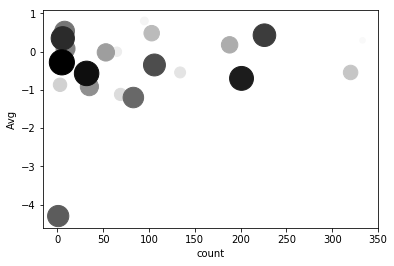

In [8]:
df_dif = pd.DataFrame(index = vec.get_feature_names(), columns=['Avg','count'])
for i, cname in enumerate(vec.get_feature_names()):
    df_dif.loc[cname, 'Avg'] = df[df[cname] == 1]['difference'].mean()
    df_dif.loc[cname,'count'] = cnt[i]
    df_dif.loc[cname, 'You rated'] = df[df[cname] == 1]['You rated'].mean()
    df_dif.loc[cname, 'IMDb Rating'] = df[df[cname] == 1]['IMDb Rating'].mean()
    
df_dif.sort_values('count',ascending=False)
df_dif.Avg=df_dif.Avg.astype(float)
df_dif['count']=df_dif['count'].astype(float)
df_dif.plot.scatter('count','Avg',np.arange(df_dif.shape[0])*30, range(df_dif.shape[0]))



In [9]:
help(df_dif.plot.scatter)

Help on method scatter in module pandas.plotting._core:

scatter(x, y, s=None, c=None, **kwds) method of pandas.plotting._core.FramePlotMethods instance
    Scatter plot
    
    .. versionadded:: 0.17.0
    
    Parameters
    ----------
    x, y : label or position, optional
        Coordinates for each point.
    s : scalar or array_like, optional
        Size of each point.
    c : label or position, optional
        Color of each point.
    **kwds : optional
        Keyword arguments to pass on to :py:meth:`pandas.DataFrame.plot`.
    
    Returns
    -------
    axes : matplotlib.AxesSubplot or np.array of them



In [10]:
df_dif.sort_values('count', ascending=False)

,Avg,count,You rated,IMDb Rating
adventure,0.297297,333.0,7.348348,7.051051
drama,-0.544063,320.0,6.909375,7.453437
action,0.066877,317.0,7.056782,6.989905
sci_fi,0.430531,226.0,7.584071,7.153540
thriller,-0.699005,201.0,6.402985,7.101990
fantasy,0.178723,188.0,7.287234,7.108511
comedy,-0.543284,134.0,6.925373,7.468657
romance,-0.348113,106.0,6.877358,7.225472
family,0.483495,103.0,7.747573,7.264078
animation,0.804211,95.0,8.463158,7.658947


In [31]:
df[(df.horror==1) & (df['You rated'] < 4) & (df['Title type'] == 'Feature Film')].Title

32                                   Águas Rasas
39                                    Sala Verde
147                                    A Colônia
166            João e Maria: Caçadores de Bruxas
340                                  Morte Negra
350    Os Instrumentos Mortais: Cidade dos Ossos
493         Abraham Lincoln: Caçador de Vampiros
555           A Múmia: Tumba do Imperador Dragão
Name: Title, dtype: object

<Container object of 22 artists>

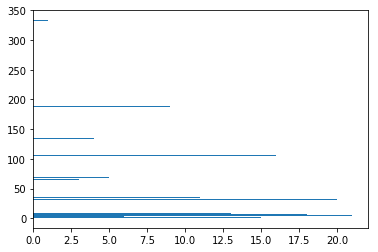

In [12]:
cnt = np.array(X.sum(0))[0]
plt.barh(cnt,range(len(vec.get_feature_names())))

In [13]:
X.sum(0).shape

(1, 22)